# Diamond Price Prediction Model

This notebook provides a step-by-step guide to building a machine learning model for predicting diamond prices. The steps include data preprocessing, visualization, model training, evaluation, and deployment.


## 1. Python Modules Used

The following Python modules are used in this notebook:

- `pandas`: For data manipulation and analysis
- `numpy`: For numerical operations
- `matplotlib` & `seaborn`: For data visualization
- `scikit-learn`: For machine learning, including model selection, preprocessing, and evaluation
- `joblib`: For saving and loading the trained model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib

## 2. Load the Dataset
load the Diamonds dataset from a CSV file. This dataset contains various attributes of diamonds, which will be used to predict their prices.

## About the Dataset

The dataset used in this notebook is the "Diamonds" dataset, which contains various attributes of diamonds, including:
- `carat`: The weight of the diamond
- `cut`: The quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- `color`: The color grade (D to J, with D being the best)
- `clarity`: The clarity grade (IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1)
- `depth`: The depth percentage (total depth/diameter)
- `table`: The table percentage (width of the top of the diamond relative to its widest point)
- `price`: The price of the diamond
- `x`, `y`, `z`: The length, width, and depth of the diamond

The goal is to predict the `price` of diamonds based on these attributes.

In [ ]:
# Load the dataset
diamonds = pd.read_csv('diamonds/diamonds.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 3. Data Pre-Processing & Feature Selection

Data pre-processing involves cleaning the data, handling missing values, dealing with noisy data, removing outliers, and transforming categorical variables into numerical variables. These steps are crucial to ensure the data is in a suitable format for model training.


In [ ]:
# Show dataset information
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
# Drop the "Unnamed: 0" column
diamonds = diamonds.drop(['Unnamed: 0'], axis=1)

# Ensure 'price' column is of type float
diamonds["price"] = diamonds["price"].astype(float)
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Handling Missing Values and Removing Records with Zero Dimensions

We drop records with zero dimensions (`x`, `y`, `z` values) and check for missing values in the dataset.


In [ ]:
# Drop records with zero dimensions
diamonds = diamonds.drop(diamonds[diamonds["x"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["y"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["z"]==0].index)
diamonds.shape

(53920, 10)

In [ ]:
# Check for missing values
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Removing Duplicates

Remove any duplicate records from the dataset to ensure data quality.


In [ ]:
# Drop duplicates
diamonds.drop_duplicates(inplace=True)
diamonds.shape

(53775, 10)

## 4. Data Visualization

Data visualization helps in understanding the distribution of data, relationships between features, and identifying any patterns or anomalies. And create various plots to visualize the data.


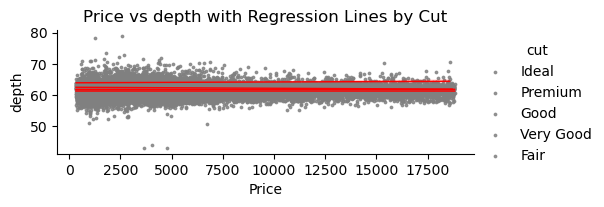

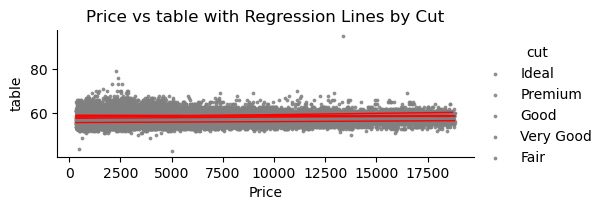

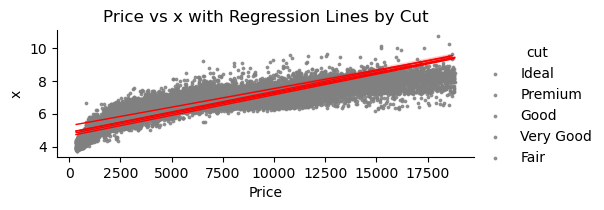

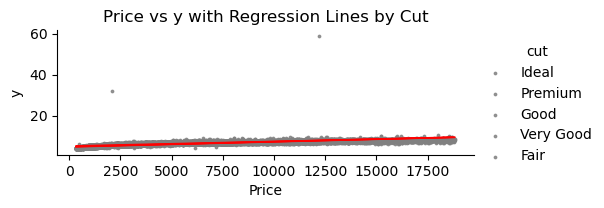

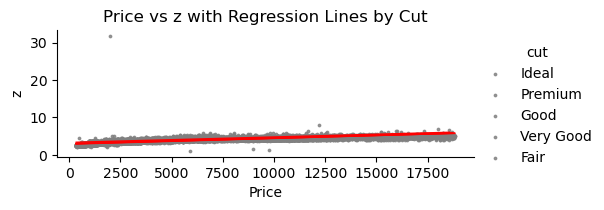

In [ ]:
titles = ['depth', 'table', 'x', 'y', 'z']
for t in titles:
    sns.lmplot(x='price', y=t, hue='cut', data=diamonds, palette='Set1', height=2, aspect=2.5,
               scatter_kws={"s": 3, "color": "grey"}, line_kws={"linewidth": 1, "color": "red"})
    plt.title(f'Price vs {t} with Regression Lines by Cut')
    plt.xlabel('Price')
    plt.ylabel(t)
    plt.show()

### Removing Outliers

Remove outliers from the dataset based on certain thresholds for different features.


In [ ]:
# Drop outliers
diamonds = diamonds[(diamonds["depth"] < 75) & (diamonds["depth"] > 45)]
diamonds = diamonds[(diamonds["table"] < 80) & (diamonds["table"] > 40)]
diamonds = diamonds[(diamonds["x"] < 30)]
diamonds = diamonds[(diamonds["y"] < 30)]
diamonds = diamonds[(diamonds["z"] < 30) & (diamonds["z"] > 2)]
diamonds.shape

(53763, 10)

### Scatter Matrix Plot of Selected Attributes

The scatter matrix plot below provides a visual representation of the relationships between different attributes of the diamonds dataset. This plot helps in identifying patterns, correlations, and potential outliers in the data.

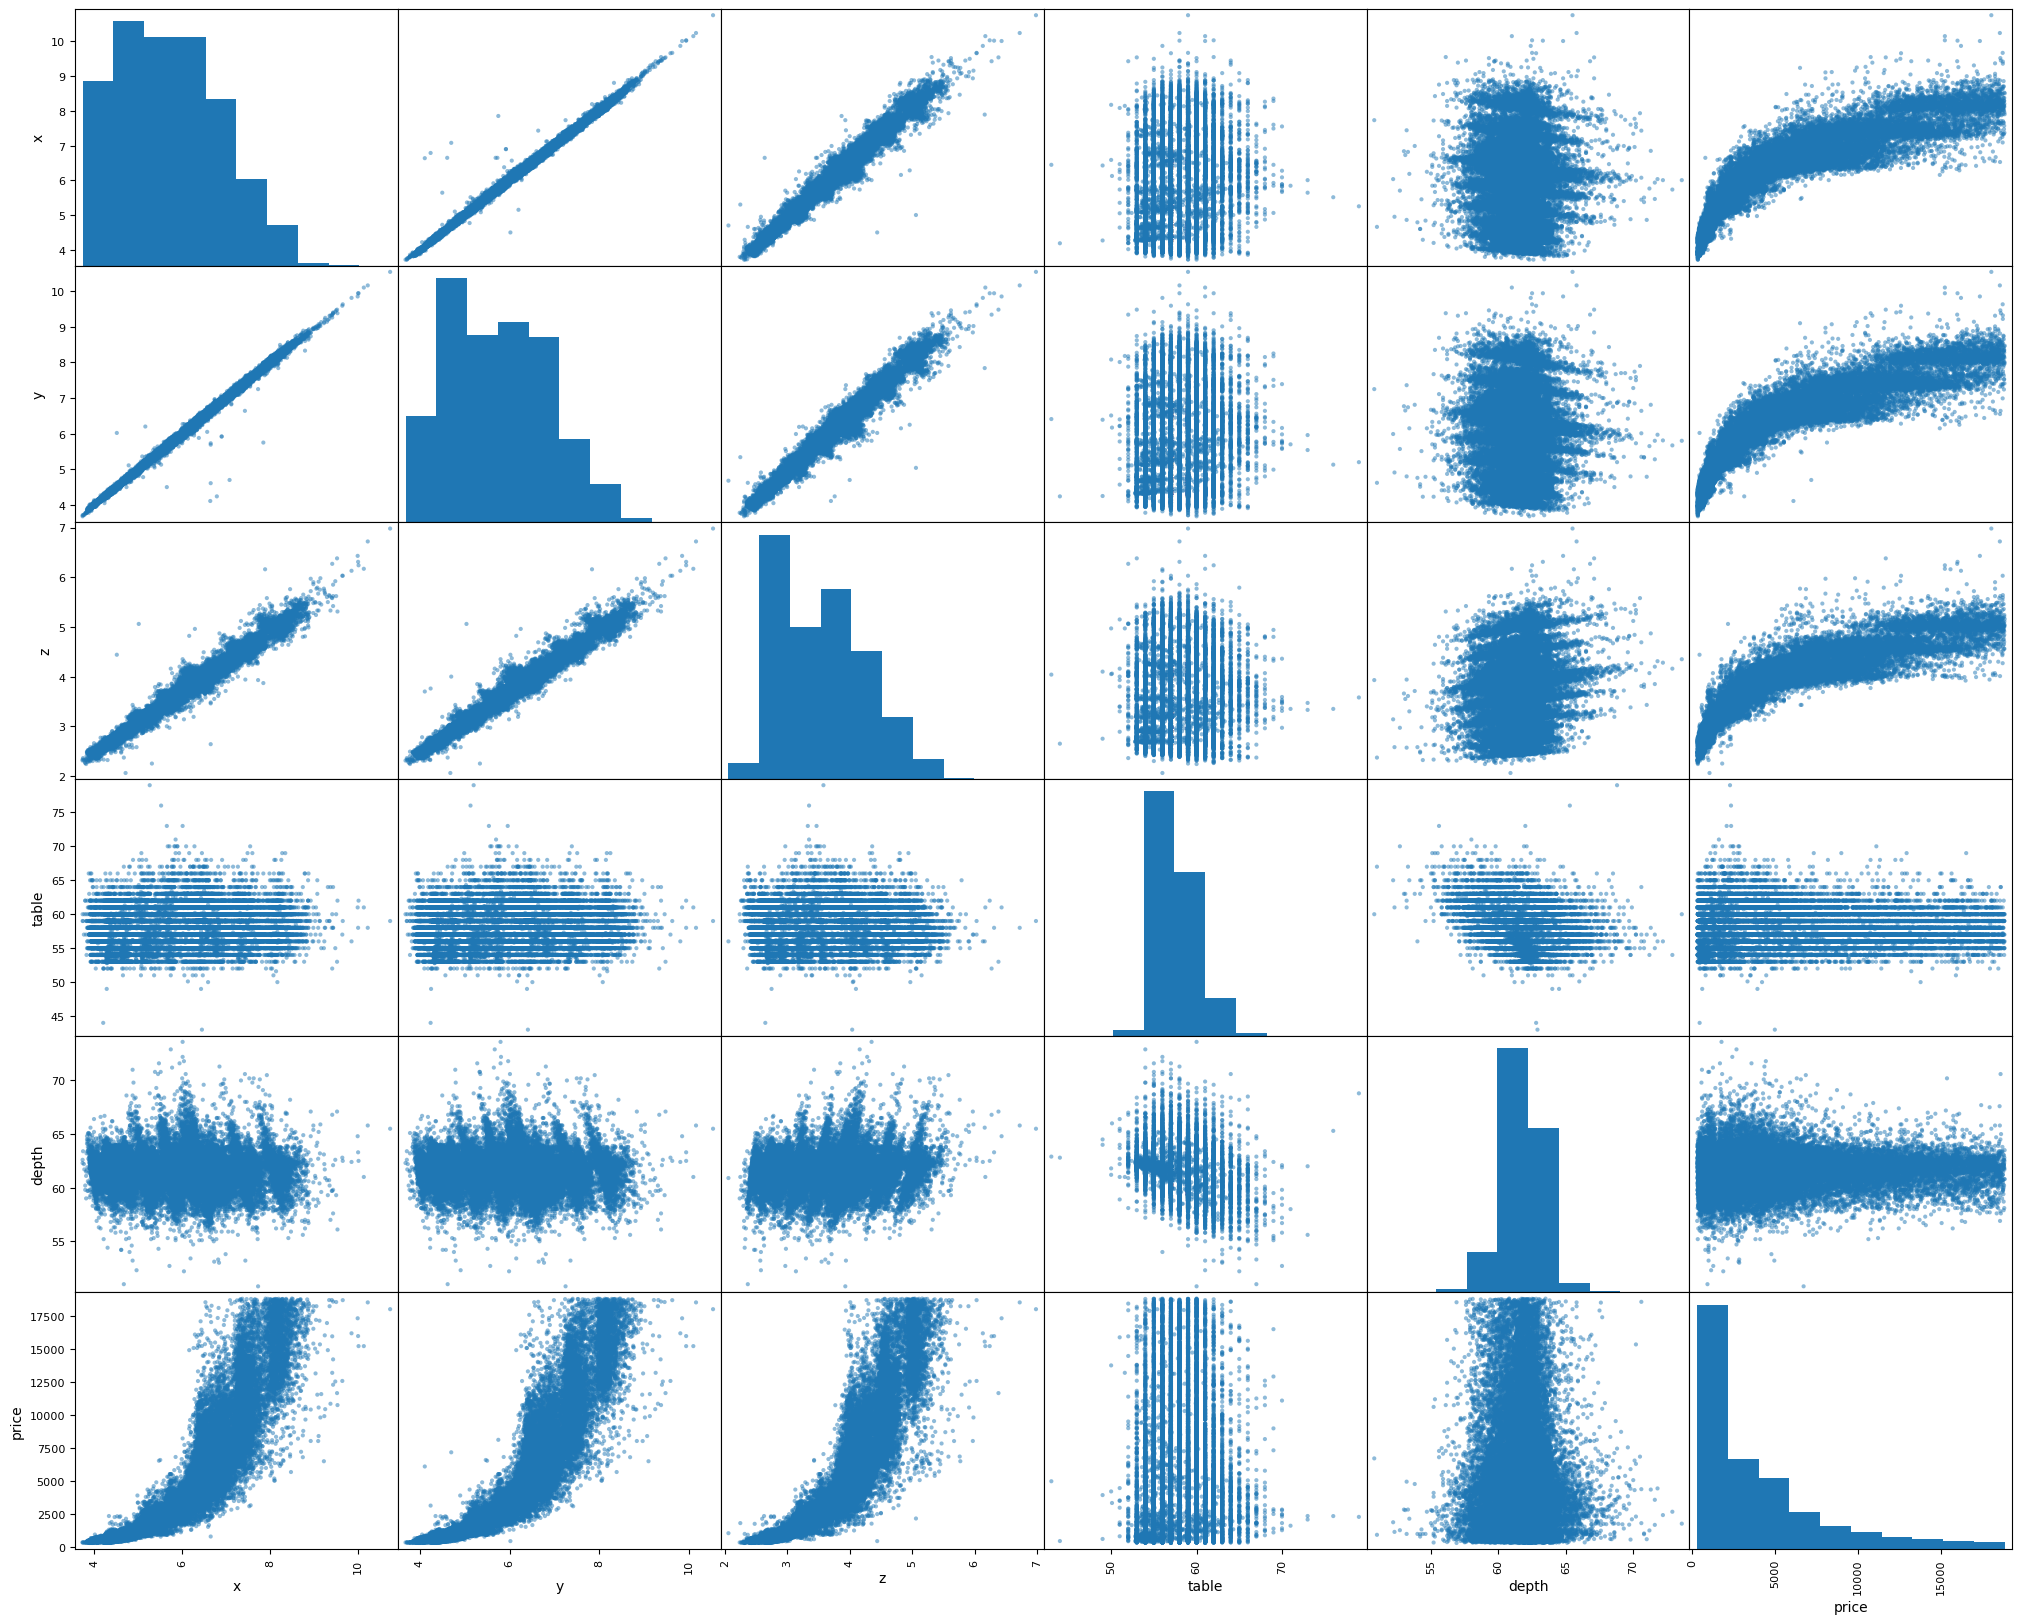

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["x", "y", "z", "table", "depth", "price"]
scatter_matrix(diamonds[attributes], figsize=(25, 20))
plt.show()

### Correlation Matrix

Create a correlation matrix to understand the relationships between numerical features.


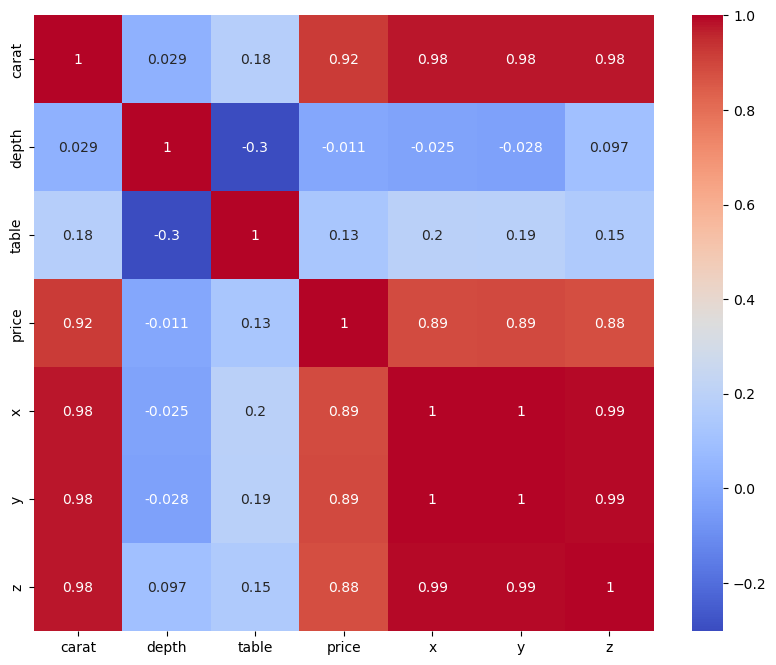

In [ ]:
# Create a correlation matrix
numeric_df = diamonds.select_dtypes(include=['float64'])
corr_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## 5. Splitting and Training the Data

Split the dataset into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate its performance.


In [ ]:
# Prepare features and target variable
data = diamonds.copy()
X = data.drop('price', axis=1)
y = data['price']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of the datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (43010, 9)
X_test shape: (10753, 9)
y_train shape: (43010,)
y_test shape: (10753,)


### Listing Numerical and Categorical Features

List the numerical and categorical features for preprocessing.


In [ ]:
# List of numerical and categorical features
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

### Defining Preprocessing Steps

Define preprocessing steps for numerical and categorical features using `StandardScaler` and `OneHotEncoder`.


In [ ]:
# Define preprocessing steps
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


## 6. Load the Models

Define a pipeline with preprocessing and model steps. Several regression models are used for prediction.


In [ ]:
# Define regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'SVR': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

### Defining a Function to Evaluate Models

Define a function to evaluate each model based on various metrics.


In [ ]:
# Define a function to evaluate a model
def evaluate_model(name, model):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    # Predict on the test data
    y_pred = pipeline.predict(X_test)
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    # Cross-Validation Mean Squared Error
    cv_mse = -cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error').mean()
    # Print evaluation metrics
    print(f'{name}:')
    print(f'  CV MSE: {cv_mse:.4f}')
    print(f'  MAE: {mae:.4f}')
    print(f'  MSE: {mse:.4f}')
    print(f'  RMSE: {rmse:.4f}')
    print(f'  R²: {r2:.4f}\n')
    return {
        'Model': name,
        'CV MSE': cv_mse,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    }

### Looping Through Each Model for Evaluation

Loop through each model, fit, predict, and evaluate it based on the defined function.


In [ ]:
# Loop through each model, fit, predict, and evaluate
results = []
for name, model in models.items():
    result = evaluate_model(name, model)
    results.append(result)

Linear Regression:
  CV MSE: 2188500.5736
  MAE: 737.0777
  MSE: 1223181.4085
  RMSE: 1105.9753
  R²: 0.9231

Ridge Regression:
  CV MSE: 2190017.7702
  MAE: 737.0713
  MSE: 1223336.9369
  RMSE: 1106.0456
  R²: 0.9230

Decision Tree:
  CV MSE: 3864181.7461
  MAE: 358.8641
  MSE: 537858.9080
  RMSE: 733.3886
  R²: 0.9662

Random Forest:
  CV MSE: 3425329.2235
  MAE: 273.2630
  MSE: 307037.4224
  RMSE: 554.1096
  R²: 0.9807

Gradient Boosting:
  CV MSE: 3737285.3982
  MAE: 411.0790
  MSE: 561134.4812
  RMSE: 749.0891
  R²: 0.9647

AdaBoost:
  CV MSE: 6889863.3007
  MAE: 1050.3096
  MSE: 2029809.7809
  RMSE: 1424.7139
  R²: 0.8723

SVR:
  CV MSE: 10569247.1430
  MAE: 1305.7335
  MSE: 7611851.3693
  RMSE: 2758.9584
  R²: 0.5212

K-Nearest Neighbors:
  CV MSE: 4420175.3799
  MAE: 403.9665
  MSE: 597073.2078
  RMSE: 772.7051
  R²: 0.9624



In [ ]:
# Display results in a DataFrame
results_df = pd.DataFrame(results)
results_df

,Model,CV MSE,MAE,MSE,RMSE,R²
0,Linear Regression,2.188501e+06,737.077669,1.223181e+06,1105.975320,0.923052
1,Ridge Regression,2.190018e+06,737.071343,1.223337e+06,1106.045631,0.923042
2,Decision Tree,3.864182e+06,358.864131,5.378589e+05,733.388647,0.966164
3,Random Forest,3.425329e+06,273.263041,3.070374e+05,554.109576,0.980685
4,Gradient Boosting,3.737285e+06,411.078954,5.611345e+05,749.089101,0.964700
5,AdaBoost,6.889863e+06,1050.309633,2.029810e+06,1424.713929,0.872308
6,SVR,1.056925e+07,1305.733457,7.611851e+06,2758.958385,0.521150
7,K-Nearest Neighbors,4.420175e+06,403.966521,5.970732e+05,772.705123,0.962439


In [ ]:
X = diamonds.drop('price',axis = 1)
y = diamonds['price']
X,y

(       carat        cut color clarity  depth  table     x     y     z
 0       0.23      Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43
 1       0.21    Premium     E     SI1   59.8   61.0  3.89  3.84  2.31
 2       0.23       Good     E     VS1   56.9   65.0  4.05  4.07  2.31
 3       0.29    Premium     I     VS2   62.4   58.0  4.20  4.23  2.63
 4       0.31       Good     J     SI2   63.3   58.0  4.34  4.35  2.75
 ...      ...        ...   ...     ...    ...    ...   ...   ...   ...
 53935   0.72      Ideal     D     SI1   60.8   57.0  5.75  5.76  3.50
 53936   0.72       Good     D     SI1   63.1   55.0  5.69  5.75  3.61
 53937   0.70  Very Good     D     SI1   62.8   60.0  5.66  5.68  3.56
 53938   0.86    Premium     H     SI2   61.0   58.0  6.15  6.12  3.74
 53939   0.75      Ideal     D     SI2   62.2   55.0  5.83  5.87  3.64
 
 [53763 rows x 9 columns],
 0         326.0
 1         326.0
 2         327.0
 3         334.0
 4         335.0
           ...  
 53935    2757.0


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (43010, 9)
X_test shape: (10753, 9)
y_train shape: (43010,)
y_test shape: (10753,)


In [ ]:
# List of numerical and categorical features
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

In [ ]:
# Define preprocessing steps
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


## 7. Evaluating the Model

Select the best model based on evaluation metrics and perform hyperparameter tuning using `GridSearchCV`.


In [ ]:
# Define the pipeline with preprocessing and model steps
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2', None]  # Corrected values
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['carat',
                                                                          'depth',
                                                                          'table',
                                                                          'x',
                                                                          'y',
                                                                          'z']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['cut',
                                                                          'color',
                                                                          'clarity'])])),
                                       ('model', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'model__max_depth': [10, 20, 30],
                         'model__max_features': ['sqrt', 'log2', None],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [ ]:
# Print the best parameters and the best score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

Best parameters: {'model__max_depth': 30, 'model__max_features': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__n_estimators': 200}
Best score: -300021.37625576847


## 8. Build the Predictive Model

Save the best model and evaluate it on the test set.


In [ ]:
# Save the best model
best_model = grid_search.best_estimator_
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

MAE: 273.9189
MSE: 309577.1422
RMSE: 556.3966
R²: 0.9805


## 9. Deploy the Model

Save the trained model using `joblib` and prepare new data for prediction.


In [ ]:
# Save the best model
joblib.dump(best_model, 'Diamond-Price-Prediction-Model-Project-Final.pkl')

['Diamond-Price-Prediction-Model-Project-Final.pkl']

In [ ]:
# Prepare new data for prediction
new_data = {
    'carat': [0.23],
    'depth': [61.5],
    'table': [55.0],
    'x': [3.95],
    'y': [3.98],
    'z': [2.43],
    'cut': ['Ideal'],
    'color': ['E'],
    'clarity': ['SI2']
}

In [ ]:
# Convert the dictionary to a DataFrame
new_data_df = pd.DataFrame(new_data)

# Make predictions
predictions = best_model.predict(new_data_df)

# Print the predictions
print(predictions)

[404.12804673]


# Using the Saved Model for Predictions

In this section, Load the saved model and use it to make predictions on new data.


### Explanation

1. **Loading the Model**: Use `joblib.load` to load the previously saved model from the file `Diamond-Price-Prediction-Model-Final.pkl`.

2. **Preparing New Data**: Prepare new data in the form of a dictionary and convert it into a pandas DataFrame. This new data represents the attributes of the diamonds for which we want to predict prices.

3. **Making Predictions**: Use the `predict` method of the loaded model to make predictions on the new data. The predicted prices are then printed.

This notebook demonstrates how to load a saved machine learning model and use it to make predictions on new data, allowing for easy reuse and deployment of the trained model.


In [ ]:
# Import the necessary libraries
import pandas as pd
import joblib

# Load the saved model
saved_model = joblib.load('Diamond-Price-Prediction-Model-Final.pkl')

# Prepare new data for prediction
new_data = {
    'carat': [0.23, 0.45, 1.00],  # Example values for multiple predictions
    'depth': [61.5, 62.3, 60.0],
    'table': [55.0, 56.0, 58.0],
    'x': [3.95, 4.75, 6.50],
    'y': [3.98, 4.80, 6.52],
    'z': [2.43, 2.85, 3.90],
    'cut': ['Ideal', 'Premium', 'Good'],
    'color': ['E', 'G', 'D'],
    'clarity': ['SI2', 'VS1', 'IF']
}

# Convert the dictionary to a DataFrame
new_data_df = pd.DataFrame(new_data)

# Make predictions
predictions = saved_model.predict(new_data_df)

# Print the predictions
print("Predicted Prices for the New Data:")
print(predictions)


Predicted Prices for the New Data:
[  408.53617846   966.29171598 15656.13859685]


# Conclusion and Future Development

## Conclusion

In this notebook, I successfully built a predictive model for diamond prices using various machine learning algorithms. The steps to followed were:

1. **Importing Required Libraries**: Imported necessary libraries for data manipulation, visualization, and model building.
2. **Loading the Dataset**: Loaded the diamonds dataset and performed initial exploration.
3. **Data Pre-Processing & Feature Selection**: Cleaned the data, handled missing values, removed outliers, and transformed categorical variables.
4. **Data Visualization**: Visualized the data using various plots to understand the relationships between features.
5. **Splitting and Training the Data**: Split the data into training and testing sets.
6. **Model Evaluation**: Evaluated multiple models and selected the best performing one using cross-validation.
7. **Building the Predictive Model**: Built and tuned the predictive model using GridSearchCV.
8. **Model Deployment**: Saved the trained model and demonstrated how to use it for making predictions on new data.

The model showed good performance in predicting diamond prices, with reasonable accuracy and evaluation metrics.

## Future Development

To further improve the model and its deployment, the following steps can be considered:

1. **Hyperparameter Tuning**: Explore more hyperparameters and use advanced techniques like RandomizedSearchCV for tuning.
2. **Feature Engineering**: Create new features from existing ones, such as interaction terms or polynomial features, to capture more complex relationships.
3. **Ensemble Methods**: Combine multiple models using stacking, boosting, or bagging to improve prediction performance.
4. **Model Interpretability**: Use techniques like SHAP (SHapley Additive exPlanations) values or LIME (Local Interpretable Model-agnostic Explanations) to understand the model's decisions better.
5. **Regular Updates**: Periodically update the model with new data to ensure it remains accurate over time.
6. **Scalability**: Deploy the model using scalable cloud services and APIs to handle large volumes of prediction requests.
7. **User Interface**: Develop a user-friendly interface or application to allow users to input diamond features and get price predictions easily.
8. **Integration with Other Data Sources**: Integrate additional data sources, such as market trends or economic indicators, to enhance the model's accuracy.
9. **Handling Imbalanced Data**: If the dataset is imbalanced, consider using techniques like SMOTE (Synthetic Minority Over-sampling Technique) to balance it.
10. **Real-time Predictions**: Implement real-time prediction capabilities for instant price estimation.

By following these future development steps, the predictive model can be enhanced and made more robust, providing better accuracy and usability in real-world applications.

## Acknowledgments

I would like to acknowledge the contributions of the open-source community for providing the tools and libraries used in this notebook. Special thanks to the authors and maintainers of `pandas`, `numpy`, `matplotlib`, `seaborn`, `scikit-learn`, and `joblib`.

## References

- [Pandas Documentation](https://pandas.pydata.org/)
- [NumPy Documentation](https://numpy.org/)
- [Matplotlib Documentation](https://matplotlib.org/)
- [Seaborn Documentation](https://seaborn.pydata.org/)
- [Scikit-learn Documentation](https://scikit-learn.org/)
- [Joblib Documentation](https://joblib.readthedocs.io/)

This concludes our notebook on diamond price prediction. Thank you for following along!
